In [1]:
import numpy as np
import tensorflow as tf

from env import *
from DataLoader import DataLoader
from AttGan import AttGan

In [2]:
dloader = DataLoader(BATCH_SIZE)
dloader.build()

model = AttGan(eta=ETA, num_att=dloader.num_att)
model.build()

tf.summary.FileWriter("./logdir/", graph=model.graph)

for e in range(EPOCHS):
    train_loss_g = 0.0
    train_loss_d = 0.0
    
    for X_src, X_att_a, X_att_b in dloader.next_batch():
        loss_g, loss_d = model.step(X_src, X_att_a, X_att_b)
        train_loss_g += loss_g
        train_loss_d += loss_d
        
    train_loss_g /= len(dloader)
    train_loss_d /= len(dloader)
    
    print(f"Epochs {e+1}/{EPOCHS}")
    print(f"Train generator loss: {train_loss_g:.8f}")
    print(f"Train discriminator loss: {train_loss_d:.8f}")
    
model.save("./ckpts/attgan")

W0731 01:16:01.626551 140321598322048 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:190: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 01:16:01.631087 140321598322048 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:132: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



Number of images: 1000
Number of attributes: 40
Number of batches: 8
Building Attgan...


W0731 01:16:01.824813 140321598322048 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:41: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



Building generator...
Generator was built.
Building discriminator...


W0731 01:16:02.348870 140321598322048 deprecation.py:323] From /home/jylee/.conda/envs/tf1env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Discriminator was built.


W0731 01:16:07.072447 140321598322048 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:82: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0731 01:16:09.121306 140321598322048 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:83: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

W0731 01:16:10.218830 140321598322048 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:85: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



Attgan was built.
Epochs 1/50
Train generator loss: 4.57853884
Train discriminator loss: 4.28353256
Epochs 2/50
Train generator loss: 4.24223757
Train discriminator loss: 4.04394978
Epochs 3/50
Train generator loss: 3.90823853
Train discriminator loss: 4.03860658
Epochs 4/50
Train generator loss: 3.77488706
Train discriminator loss: 4.02105820
Epochs 5/50
Train generator loss: 3.70022550
Train discriminator loss: 4.00418523
Epochs 6/50
Train generator loss: 3.64596424
Train discriminator loss: 3.96208072
Epochs 7/50
Train generator loss: 3.60503003
Train discriminator loss: 3.93226314
Epochs 8/50
Train generator loss: 3.57321835
Train discriminator loss: 3.91839549
Epochs 9/50
Train generator loss: 3.54822004
Train discriminator loss: 3.89870089
Epochs 10/50
Train generator loss: 3.52853298
Train discriminator loss: 3.86947042
Epochs 11/50
Train generator loss: 3.51395032
Train discriminator loss: 3.84066400
Epochs 12/50
Train generator loss: 3.50303361
Train discriminator loss: 3.8141

In [3]:
import cv2
import matplotlib.pyplot as plt

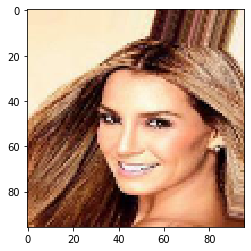

In [4]:
img = cv2.imread("data_sample/img_align_celeba/000001.jpg")
img = cv2.resize(img, dsize=(96, 96)).astype(np.float32)

img = (img - 128) / 128

img_src = cv2.cvtColor((img + 1)/2, cv2.COLOR_BGR2RGB)
plt.imshow(img_src)

In [5]:
img

array([[[ 0.515625 ,  0.8046875,  0.9765625],
        [ 0.515625 ,  0.8046875,  0.9765625],
        [ 0.515625 ,  0.8046875,  0.9765625],
        ...,
        [ 0.4375   ,  0.796875 ,  0.9296875],
        [ 0.7421875,  0.796875 ,  0.953125 ],
        [ 0.734375 ,  0.859375 ,  0.984375 ]],

       [[ 0.515625 ,  0.8046875,  0.9765625],
        [ 0.515625 ,  0.8046875,  0.9765625],
        [ 0.515625 ,  0.8046875,  0.9765625],
        ...,
        [ 0.53125  ,  0.859375 ,  0.96875  ],
        [ 0.7578125,  0.8203125,  0.96875  ],
        [ 0.7421875,  0.8671875,  0.9921875]],

       [[ 0.515625 ,  0.8046875,  0.9765625],
        [ 0.515625 ,  0.8046875,  0.9765625],
        [ 0.515625 ,  0.8046875,  0.9765625],
        ...,
        [ 0.609375 ,  0.875    ,  0.984375 ],
        [ 0.7578125,  0.84375  ,  0.96875  ],
        [ 0.71875  ,  0.84375  ,  0.96875  ]],

       ...,

       [[-0.4609375, -0.0625   ,  0.4453125],
        [-0.453125 , -0.0859375,  0.4296875],
        [-0.859375 , -

In [6]:
img_converted = model.convert(img.reshape(1, *img.shape), np.ones((1, 40)))

In [7]:
img_converted.shape

(1, 96, 96, 3)

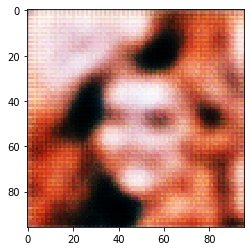

In [8]:
img_converted = cv2.cvtColor(img_converted.squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow((img_converted*128 + 128)/255)

In [9]:
model.Gparams

[<tf.Variable 'attgan/params/Variable:0' shape=(5, 5, 3, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_1:0' shape=(1, 1, 1, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_2:0' shape=(5, 5, 16, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_3:0' shape=(1, 1, 1, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_4:0' shape=(5, 5, 16, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_5:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_6:0' shape=(5, 5, 32, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_7:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_8:0' shape=(5, 5, 32, 72) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_9:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_10:0' shape=(5, 5, 16, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_11:0' shape=(1, 1, 1, 16) dtype=float32_ref>,

In [10]:
model.X_att_b.get_shape().as_list()

[None, 40]

In [11]:
img.min()

-1.0

In [12]:
img_converted.max()

0.98365843

In [13]:
X_att_a.shape

(104, 40)

In [14]:
X_att_b.shape

(104, 40)